Methods: 

  Kmeans
  
  Equal width
  
  quantile

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings 
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.shape

(891, 3)

In [4]:
df.ndim

2

In [5]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [10]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [11]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.6703910614525139

In [12]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6543570536828963

In [13]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [14]:
ct=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])])

In [15]:
x_train_ct=ct.fit_transform(x_train)
x_test_ct=ct.transform(x_test)

this code shows about bins

In [16]:
ct.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=10)

this code shows about no. of bins

In [17]:
ct.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=10)

this code shows that in which range the bins are distributed

In [18]:
ct.named_transformers_['second'].bin_edges_

array([array([  0.     ,   7.55   ,   7.88916,   8.05   ,  10.5    ,  14.4542 ,
               21.045  ,  26.55   ,  39.6875 ,  77.2875 , 512.3292 ])          ],
      dtype=object)

In [19]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_ct':x_train_ct[:,0],
    'fare':x_train['Fare'],
    'far_ct':x_train_ct[:,1]
})

In [20]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=ct.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=ct.named_transformers_['second'].bin_edges_[0].tolist())


In [21]:
output.sample(5)

,age,age_ct,fare,far_ct,age_labels,fare_labels
542,11.0,0.0,31.2750,7.0,"(0.42, 16.0]","(26.55, 39.688]"
880,25.0,3.0,26.0000,6.0,"(24.0, 28.0]","(21.045, 26.55]"
247,24.0,3.0,14.5000,5.0,"(21.0, 24.0]","(14.454, 21.045]"
202,34.0,6.0,6.4958,0.0,"(32.0, 38.0]","(0.0, 7.55]"
821,27.0,3.0,8.6625,3.0,"(24.0, 28.0]","(8.05, 10.5]"


In [23]:
dtc.fit(x_train_ct,y_train)
y_pred_2=dtc.predict(x_test_ct)
accuracy_score(y_test,y_pred_2)

0.6871508379888268

In [25]:
x_ct=ct.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6565792759051187

In [32]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    ct= ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = ct.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6577153558052434


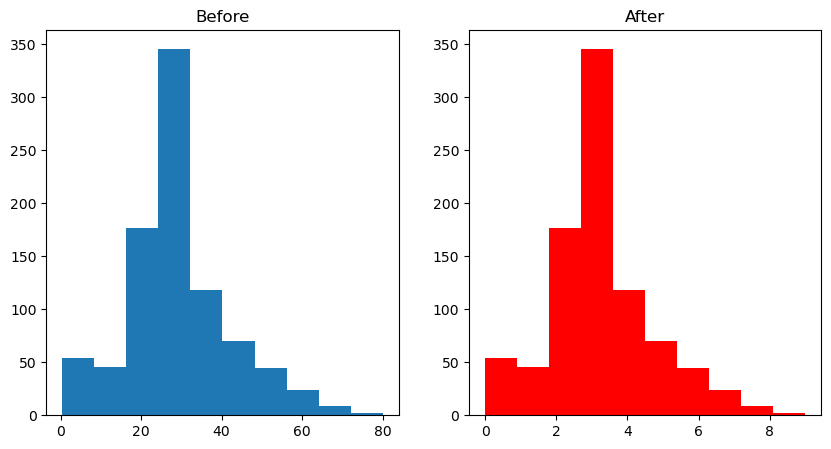

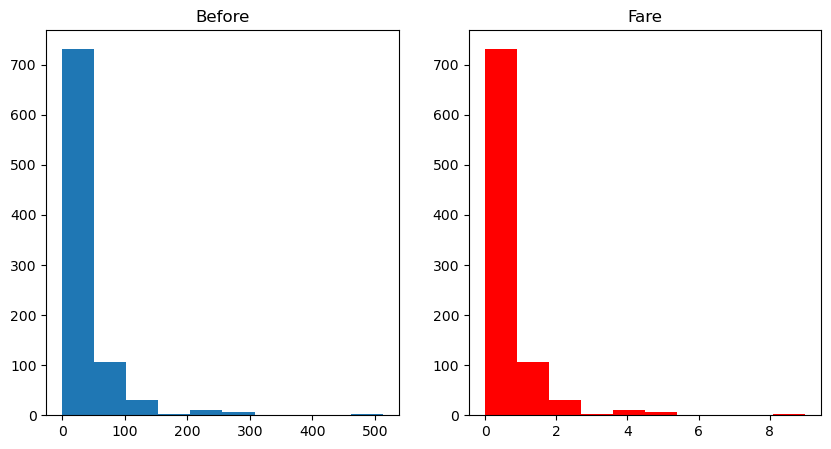

In [33]:
discretize(10,'uniform')

0.6532334581772783


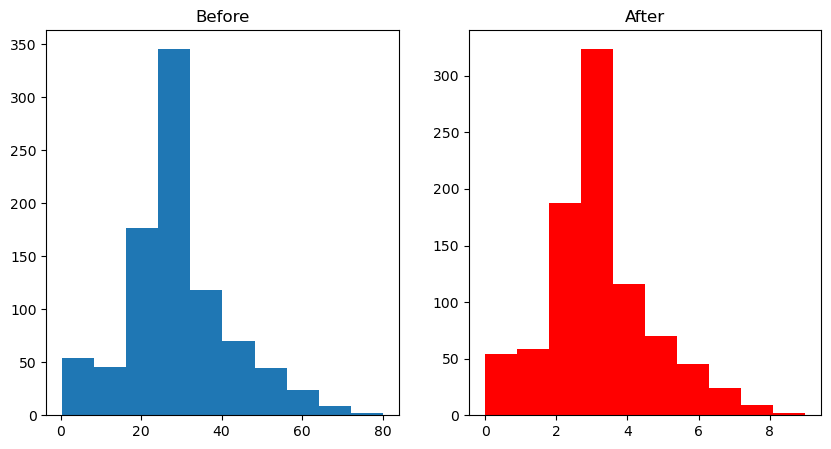

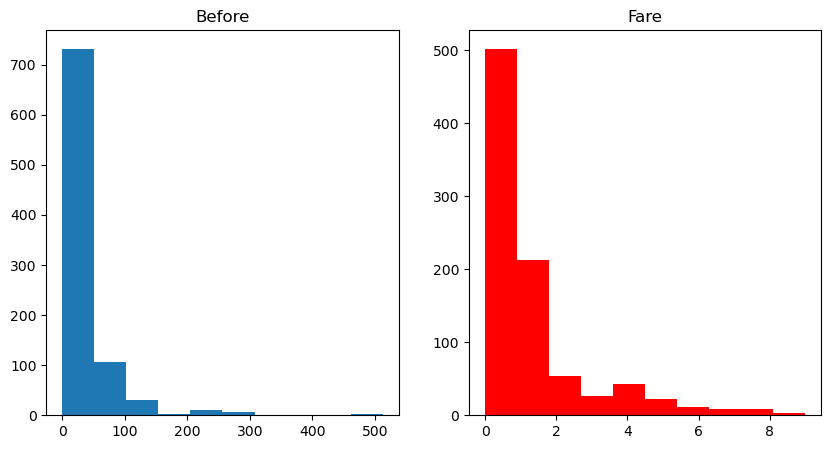

In [35]:
discretize(10,'kmeans')

0.6622097378277154


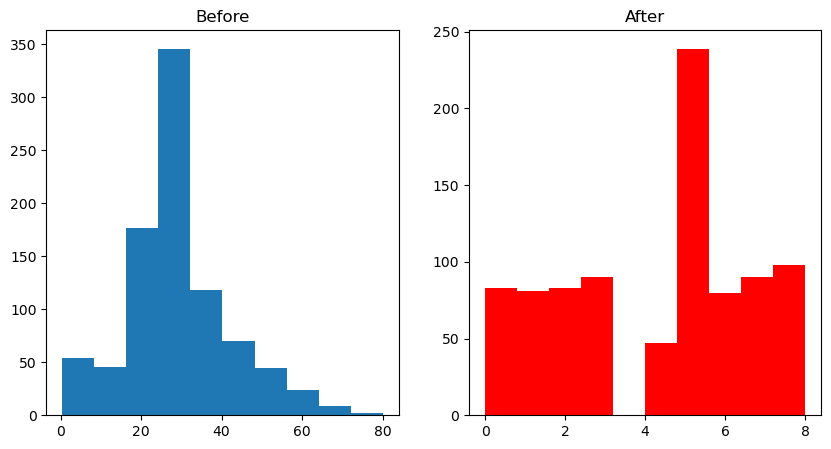

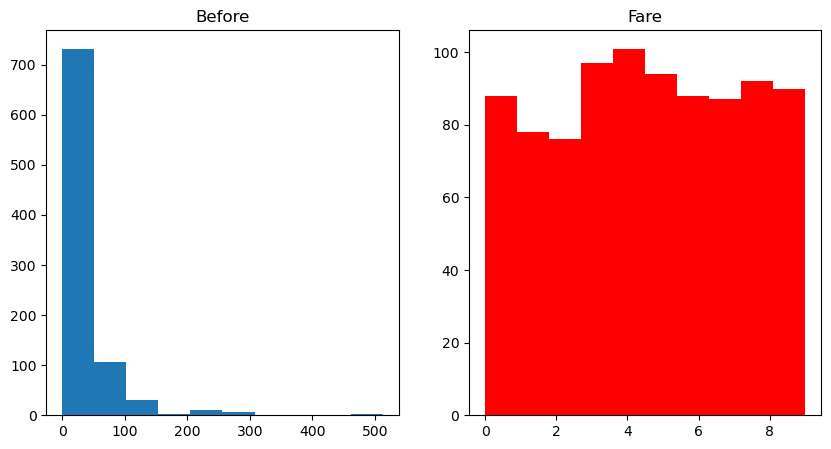

In [34]:
discretize(10,'quantile')